# PERKENALAN

Grade Challenge 1 submission oleh Sutisna

Dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Regression.

Unduh dataset yang akan digunakan disini: berisi data rideshare dari uber dan lyft

https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma?select=rideshare_kaggle.csv

Objective: kita akan melakukan prediksi harga (price) dengan menggunakan konsep linear regression

# IMPORT PUSTAKA

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression

# DATA LOADING

In [128]:
df = pd.read_csv('rideshare_kaggle.csv')

In [129]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# DATA CLEANING

Delete kolom 'timezone' karena mempunyai isi yang sama. dan kolom 'datetime'

In [131]:
df = df.drop('timezone', axis=1)

In [132]:
df = df.drop('datetime', axis=1)

kita akan menghitung persentase jumlah null untuk setiap kolom 

In [133]:
df.isnull().sum().sum()/(df.count())*100

id                             7.949402
timestamp                      7.949402
hour                           7.949402
day                            7.949402
month                          7.949402
source                         7.949402
destination                    7.949402
cab_type                       7.949402
product_id                     7.949402
name                           7.949402
price                          8.635905
distance                       7.949402
surge_multiplier               7.949402
latitude                       7.949402
longitude                      7.949402
temperature                    7.949402
apparentTemperature            7.949402
short_summary                  7.949402
long_summary                   7.949402
precipIntensity                7.949402
precipProbability              7.949402
humidity                       7.949402
windSpeed                      7.949402
windGust                       7.949402
windGustTime                   7.949402


Dikarenakan persentase nilai na kurang dari 8%, maka bisa kita hilangkan nilai-nilai tersebut tanpa kehilangan informasi yang penting.

In [134]:
df = df.dropna()

In [135]:
df['source'].describe()

count                 637976
unique                    12
top       Financial District
freq                   54197
Name: source, dtype: object

In [136]:
df['destination'].describe()

count                 637976
unique                    12
top       Financial District
freq                   54192
Name: destination, dtype: object

Dikarenakan kolom 'product id' dan 'name' mempunyai informasi yang sama, maka kita akan hilangkan kolom product_id

In [137]:
df = df.drop('product_id', axis=1)

# EXPLORASI DATA

Selanjutnya kita akan analisa setiap kolom dengan melihat grafiknya

(array([2.69805e+05, 1.84912e+05, 1.30154e+05, 4.38570e+04, 7.21500e+03,
        1.44000e+03, 4.08000e+02, 9.00000e+01, 7.30000e+01, 2.20000e+01]),
 array([ 2.5, 12. , 21.5, 31. , 40.5, 50. , 59.5, 69. , 78.5, 88. , 97.5]),
 <BarContainer object of 10 artists>)

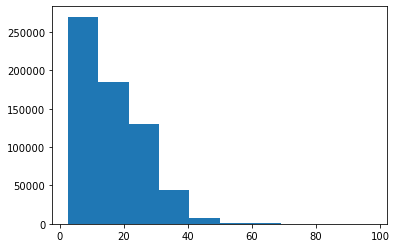

In [138]:
#Plot price (yang akan kita jadikan predictant)
plt.hist(df['price'])

Dapat dilihat bahwa grafik price adalah left skewed, tetapi dikarenakan price adalah variabel bergantung, maka tidak masalah

[Text(0, 0, ' Mostly Cloudy '),
 Text(1, 0, ' Rain '),
 Text(2, 0, ' Clear '),
 Text(3, 0, ' Partly Cloudy '),
 Text(4, 0, ' Overcast '),
 Text(5, 0, ' Light Rain '),
 Text(6, 0, ' Foggy '),
 Text(7, 0, ' Possible Drizzle '),
 Text(8, 0, ' Drizzle ')]

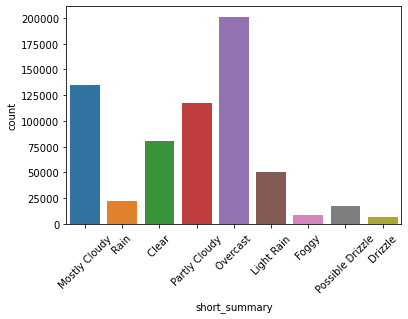

In [139]:
#Grafik untuk tipe-tipe cuaca untuk short summary
chart=sns.countplot(x='short_summary',data=df)        
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, ' Rain throughout the day. '),
 Text(1, 0, ' Rain until morning, starting again in the evening. '),
 Text(2, 0, ' Light rain in the morning. '),
 Text(3, 0, ' Partly cloudy throughout the day. '),
 Text(4, 0, ' Mostly cloudy throughout the day. '),
 Text(5, 0, ' Light rain in the morning and overnight. '),
 Text(6, 0, ' Light rain until evening. '),
 Text(7, 0, ' Foggy in the morning. '),
 Text(8, 0, ' Overcast throughout the day. '),
 Text(9, 0, ' Possible drizzle in the morning. '),
 Text(10, 0, ' Rain in the morning and afternoon. ')]

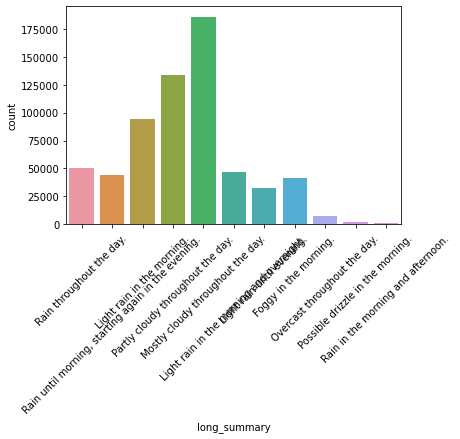

In [140]:
#Grafik untuk tipe-tipe cuaca untuk long summary
chart1=sns.countplot(x='long_summary',data=df)        
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

Grafik untuk source dan destination, dapat dilihat isinya hampir sama rata

[Text(0, 0, 'North Station'),
 Text(1, 0, 'Northeastern University'),
 Text(2, 0, 'West End'),
 Text(3, 0, 'Haymarket Square'),
 Text(4, 0, 'South Station'),
 Text(5, 0, 'Fenway'),
 Text(6, 0, 'Theatre District'),
 Text(7, 0, 'Beacon Hill'),
 Text(8, 0, 'Back Bay'),
 Text(9, 0, 'North End'),
 Text(10, 0, 'Financial District'),
 Text(11, 0, 'Boston University')]

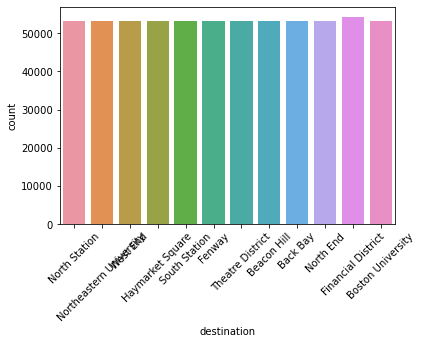

In [141]:
chart0=sns.countplot(x='source',data=df)        
chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45)
chart2=sns.countplot(x='destination',data=df)        
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

berikut grafik hour, dapat dilihat bahwa untuk grafik hour spike di jam malam 00:00, pagi 10:00, siang 15:00, malam 22:00

(array([82505., 51655., 48142., 71940., 55864., 55994., 83816., 56033.,
        50030., 81997.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

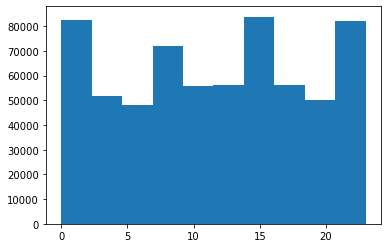

In [142]:
plt.hist(df['hour'])

Grafik cab type dan hour, dapat dilihat bahwa tidak banyak perbedaan untuk setiap jam antara uber dan lyft

<AxesSubplot:xlabel='hour', ylabel='count'>

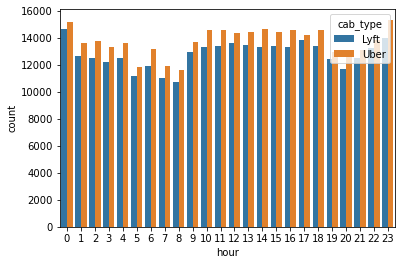

In [143]:
sns.countplot(x='hour',hue="cab_type",data=df)

berikutnya kita plot berdasarkan hari, terlihat bahwa tanggal 9 dan 10 sangat kecil

<AxesSubplot:xlabel='day', ylabel='count'>

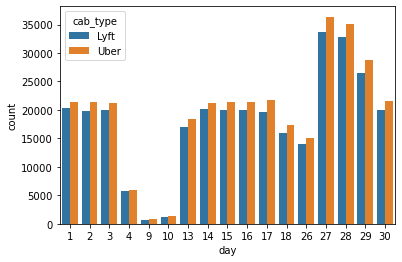

In [144]:
sns.countplot(x='day',hue="cab_type",data=df)

grafik untuk bulan kalender, dapat dilihat bahwa mulai dari end Nov sampai dengan mid Dec transaksinya sedikit.

<AxesSubplot:xlabel='day', ylabel='count'>

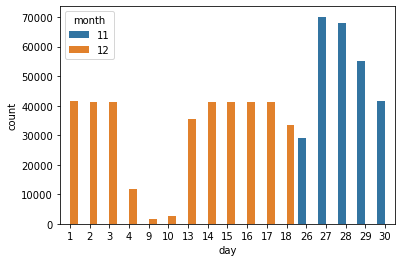

In [145]:
sns.countplot(x='day',hue="month",data=df)

Berikutnya kita akan membuang 2 kolom yaitu 'icon' (karena ada perbedaan antara icon dan short summary) dan kolom short summary (karena kita akan menggunakan kolom long summary)

In [146]:
df=df.drop('icon', axis=1)
df=df.drop('short_summary', axis=1)

Data terlihat di grafik dibawah ini, kolom price menyebar sepanjang waktu (hour)

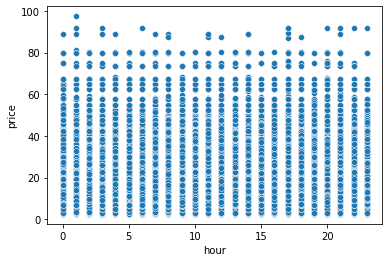

In [147]:
chart3=sns.scatterplot(x='hour',y='price',data=df)

kita akan tetap menggunakan kategorik variabel, sehingga untuk latitude dan longitude akan kita hilangkan.

In [148]:
df=df.drop('latitude', axis=1)
df=df.drop('longitude', axis=1)

# DATA PREPROCESSING

Selanjutnya kita akan membagi kolom price ke dalam variabel y, dataframe yang tidak ada kolom price.

In [149]:
y=df['price']
df=df.drop('price', axis=1)

Karena sudah ada kolom timestamp, maka kolom hour, day, dan month dapat kita hilangkan.

In [150]:
df=df.drop(['hour','day','month'], axis=1)

In [151]:
#set index
df=df.set_index(df.columns[0])

kita akan membuat dataframe untuk data dengan type object (categorical data)

In [152]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head(5)

,source,destination,cab_type,name,long_summary
id,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,Haymarket Square,North Station,Lyft,Shared,Rain throughout the day.
4bd23055-6827-41c6-b23b-3c491f24e74d,Haymarket Square,North Station,Lyft,Lux,"Rain until morning, starting again in the eve..."
981a3613-77af-4620-a42a-0c0866077d1e,Haymarket Square,North Station,Lyft,Lyft,Light rain in the morning.
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,Haymarket Square,North Station,Lyft,Lux Black XL,Partly cloudy throughout the day.
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,Haymarket Square,North Station,Lyft,Lyft XL,Mostly cloudy throughout the day.


membuat dummy variabel

In [153]:
dummy=pd.get_dummies(obj_df, columns=["source", "destination","cab_type","name","long_summary"], prefix=["start", "end","cab","type","weather"])

Selanjutnya kita akan mencopy dataframe yang berisi varibel non-weather.

In [154]:
df1=df
df.drop(df.iloc[:, 10:44], inplace = True, axis = 1)
df1=df1.drop('apparentTemperatureMaxTime', axis=1)

delete variabel kategorik, dikarenakan kita sudah membuat variabelnya.

In [155]:
df1=df1.drop(["source", "destination","cab_type","name","long_summary"], axis=1)

berikutnya membuat dataframe yang terdiri dari dummy variabel dan variabel yang dipilih

In [156]:
df=pd.concat([df1,dummy], axis=1)

# PENDEFINISIAN MODEL

Dikarenakan kita ingin prediksi variabel bergantung price (y) terhadap beberapa variabel independent. Maka kita akan menggunakan model linear regression 

# Pertama saya akan menggunakan library statsmodel.api untuk linear regressionnya.

Kita akan membagi datanya menjadi train dan test

In [157]:
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

check mean untuk kita bandingkan dengan nilai MSE

In [158]:
y.mean()

16.545125490614065

In [159]:
y_train = list(y_train)
y_test = list(y_test)

Selanjutnya kita akan membuat Hypothesis sebagai berikut:

 H0 = nilai coefisien sama dengan nol
 
 H1 = nilai coefisien tidak sama dengan nol

# PELATIHAN MODEL

In [160]:
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)

In [161]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.412e+05
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:26:22   Log-Likelihood:            -1.1900e+06
No. Observations:              510380   AIC:                         2.380e+06
Df Residuals:                  510332   BIC:                         2.381e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
timestamp                                                    -6.397e-10   5.96e-09     -0.107      0.915   -1.23e-08    1.11e-08
distance                                                         2.8871      0.004    720.655      0.000       2.879       2.895
surge_multiplier                                                18.4367      0.037    491.949      0.000      18.363      18.510
temperature                                                      0.0040      0.002      2.114      0.035       0.000       0.008
apparentTemperature                                             -0.0035      0.002     -2.231      0.026      -0.006      -0.000
start_Back Bay                                                  -0.8795      0.913     -0.963      0.336      -2.670       0.911
start_Beacon Hill                                               -1.2089      0.913     -1.324      0.186      -2.999       0.581
start_Boston University                                         -1.0688      0.913     -1.170      0.242      -2.859       0.721
start_Fenway                                                    -0.8690      0.913     -0.951      0.341      -2.659       0.921
start_Financial District                                        -0.5336      0.913     -0.584      0.559      -2.324       1.257
start_Haymarket Square                                          -0.4139      0.913     -0.453      0.650      -2.204       1.376
start_North End                                                 -0.2602      0.913     -0.285      0.776      -2.050       1.530
start_North Station                                             -0.8113      0.913     -0.888      0.374      -2.601       0.979
start_Northeastern University                                   -1.1112      0.913     -1.217      0.224      -2.901       0.679
start_South Station                                             -0.6163      0.913     -0.675      0.500      -2.406       1.174
start_Theatre District                                          -0.3612      0.913     -0.395      0.692      -2.151       1.429
start_West End                                                  -0.8150      0.913     -0.892      0.372      -2.605       0.975
end_Back Bay                                                    -0.8032      0.913     -0.879      0.379      -2.593       0.987
end_Beacon Hill                                                 -1.1159      0.913     -1.222      0.222      -2.906       0.674
end_Boston University                                           -0.7679      0.913     -0.841      0.400      -2.558       1.022
end_Fenway                                                      -1.0835      0.913     -1.186      0.236      -2.874

# Model Analysis

Dari summary diatas dapat kita simpulkan bahwa:
1. timestamp mempunyai p-value yang tinggi
2. Distance, surge multiplier, temperature, apparent temperature mempunyai p-values yang rendah (karenanya kolom-kolom significant.
3. Locations start and stop mempunyai p-values yang tinggi (sehingga tidak significant)
4. Type of cab also mempunyai p-value yang rendah, mengindikasikan significant kecuali untuk Lux SUV
5. Cab name juga mempunyai p-value yang tinggi, mengindikasikan tidak ada perbedaan antara Uber dan Lyft
6. Semua weather variabel  mempunyai p-value yang tinggi.

# EVALUASI MODEL

Kita akan menghilangkan semua kolom yang mempunyai p-value yang tinggi dan menggunakan kolom hour, day, month, kolom timestamp tidak kita gunakan. Kita akan membuat ulang dataframe dengan variabel yang penting dan menambahkan dummy variabel kedalamnya. 

In [162]:
df = pd.read_csv('rideshare_kaggle.csv')
df = df.set_index(df.columns[0])
df = df.dropna()

In [163]:
df.drop(df.iloc[:, 18:55], inplace = True, axis = 1)
df = df.drop(['price','latitude','longitude','apparentTemperatureMaxTime','timestamp','datetime','timezone','source','destination','cab_type','product_id','name'],axis=1)

In [164]:
df=pd.concat([df,dummy], axis=1)
df.drop(df.iloc[:, 7:33], inplace = True, axis = 1)
df.drop(df.iloc[:, 19:30], inplace = True, axis = 1)

Menambahkan dummy variabel yang sudah dibuat sebelumnya.

In [165]:
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [166]:
y_train = list(y_train)
y_test = list(y_test)

In [167]:
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 3.613e+05
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:26:37   Log-Likelihood:            -1.1948e+06
No. Observations:              510380   AIC:                         2.390e+06
Df Residuals:                  510361   BIC:                         2.390e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
hour                    0.0003      0.001      0.638      0.523      -0.001       0.001
day                    -0.0009      0.001     -1.137      0.256      -0.002       0.001
month                  -0.0061      0.015     -0.405      0.685      -0.035       0.023
distance                2.7957      0.003    901.569      0.000       2.790       2.802
surge_multiplier       18.3232      0.038    486.486      0.000      18.249      18.397
temperature             0.0049      0.002      2.754      0.006       0.001       0.008
apparentTemperature    -0.0043      0.002     -2.782      0.005      -0.007      -0.001
type_Black             -3.8850      0.196    -19.826      0.000      -4.269      -3.501
type_Black SUV          5.8781      0.196     29.993      0.000       5.494       6.262
type_Lux               -7.3006      0.196    -37.201      0.000      -7.685      -6.916
type_Lux Black         -2.0101      0.196    -10.242      0.000      -2.395      -1.625
type_Lux Black XL       7.2443      0.196     36.911      0.000       6.860       7.629
type_Lyft             -15.4846      0.196    -78.897      0.000     -15.869     -15.100
type_Lyft XL           -9.7768      0.196    -49.808      0.000     -10.162      -9.392
type_Shared           -18.3642      0.196    -93.689      0.000     -18.748     -17.980
type_UberPool         -15.6461      0.196    -79.832      0.000     -16.030     -15.262
type_UberX            -14.6333      0.196    -74.663      0.000     -15.017     -14.249
type_UberXL            -8.7207      0.196    -44.503      0.000      -9.105      -8.337
type_WAV              -14.6355      0.196    -74.684      0.000     -15.020     -14.251
==============================================================================
Omnibus:                   204367.593   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3727218.950
Skew:                           1.464   Prob(JB):                         0.00
Kurtosis:                      15.911   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Analysis

Dari Summary diatas dapat dilihat bahwa:
1. kolom hour, day dan time tidak mempunyai efek ke persamaan
2. Begitu juga dengan kolom temperature dan apparent temperature
3. Sehingga harga argo hanya bergantung pada variabel distance, surge_multiplier dan type of cab.

Kita akan menghilangkan kolom hour, day, month, temperature dan apparent temperature

In [169]:
df.drop(df.iloc[:, 0:3], inplace = True, axis = 1)
df=df.drop(['apparentTemperature','temperature'],axis = 1)

Kita akan menjalankan ulang modelnya.

In [170]:
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [171]:
y_train = list(y_train)
y_test = list(y_test)

In [172]:
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)

In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.003e+05
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:26:39   Log-Likelihood:            -1.1948e+06
No. Observations:              510380   AIC:                         2.390e+06
Df Residuals:                  510366   BIC:                         2.390e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
distance              2.7957      0.003    901.590      0.000       2.790       2.802
surge_multiplier     18.3234      0.038    486.495      0.000      18.250      18.397
type_Black           -3.9297      0.040    -98.418      0.000      -4.008      -3.851
type_Black SUV        5.8335      0.040    146.123      0.000       5.755       5.912
type_Lux             -7.3453      0.041   -177.612      0.000      -7.426      -7.264
type_Lux Black       -2.0547      0.041    -49.655      0.000      -2.136      -1.974
type_Lux Black XL     7.1995      0.041    174.087      0.000       7.118       7.281
type_Lyft           -15.5293      0.041   -375.002      0.000     -15.610     -15.448
type_Lyft XL         -9.8214      0.041   -237.285      0.000      -9.903      -9.740
type_Shared         -18.4089      0.040   -459.515      0.000     -18.487     -18.330
type_UberPool       -15.6908      0.040   -393.033      0.000     -15.769     -15.613
type_UberX          -14.6779      0.040   -367.605      0.000     -14.756     -14.600
type_UberXL          -8.7654      0.040   -219.535      0.000      -8.844      -8.687
type_WAV            -14.6802      0.040   -367.637      0.000     -14.758     -14.602
==============================================================================
Omnibus:                   204359.954   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3726825.902
Skew:                           1.464   Prob(JB):                         0.00
Kurtosis:                      15.910   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

nilai MSE dan RMSE

In [174]:
print(mean_squared_error(y_test, predictions)) 
np.sqrt(mean_squared_error(y_test, predictions))

6.329628750448779


2.515875344775408

# Selanjutnya kita akan membuat model linear regression dengan library Scikit_learn

In [175]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

,distance,surge_multiplier,type_Black,type_Black SUV,type_Lux,type_Lux Black,type_Lux Black XL,type_Lyft,type_Lyft XL,type_Shared,type_UberPool,type_UberX,type_UberXL,type_WAV
distance,1.00,0.03,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
surge_multiplier,0.03,1.00,-0.05,-0.05,0.07,0.07,0.07,0.07,0.07,-0.05,-0.05,-0.05,-0.05,-0.05
type_Black,0.00,-0.05,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Black SUV,0.00,-0.05,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Lux,-0.00,0.07,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Lux Black,-0.00,0.07,-0.09,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Lux Black XL,-0.00,0.07,-0.09,-0.09,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Lyft,-0.00,0.07,-0.09,-0.09,-0.09,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
type_Lyft XL,-0.00,0.07,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09,-0.09
type_Shared,-0.00,-0.05,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,1.00,-0.09,-0.09,-0.09,-0.09


In [176]:
df.head(5)

,distance,surge_multiplier,type_Black,type_Black SUV,type_Lux,type_Lux Black,type_Lux Black XL,type_Lyft,type_Lyft XL,type_Shared,type_UberPool,type_UberX,type_UberXL,type_WAV
id,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,0.44,1.0,0,0,0,0,0,0,0,1,0,0,0,0
4bd23055-6827-41c6-b23b-3c491f24e74d,0.44,1.0,0,0,1,0,0,0,0,0,0,0,0,0
981a3613-77af-4620-a42a-0c0866077d1e,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,0.44,1.0,0,0,0,0,1,0,0,0,0,0,0,0
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,0.44,1.0,0,0,0,0,0,0,1,0,0,0,0,0


In [177]:
#kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [178]:
#kita bikin object linear regresi
lin_reg = LinearRegression()

In [179]:
#train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [180]:
#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.79556645e+00 1.83239775e+01 7.67217012e+11 7.67217012e+11
 7.67217012e+11 7.67217012e+11 7.67217012e+11 7.67217012e+11
 7.67217012e+11 7.67217012e+11 7.67217012e+11 7.67217012e+11
 7.67217012e+11 7.67217012e+11]
-767217012338.2019


In [181]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': df.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,distance,2.795566e+00
1,surge_multiplier,1.832398e+01
2,type_Black,7.672170e+11
3,type_Black SUV,7.672170e+11
4,type_Lux,7.672170e+11
5,type_Lux Black,7.672170e+11
6,type_Lux Black XL,7.672170e+11
7,type_Lyft,7.672170e+11
8,type_Lyft XL,7.672170e+11
9,type_Shared,7.672170e+11


In [182]:
y_pred = lin_reg.predict(x_test)

In [183]:
#kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.9273961726926336

Model kita mendapatkan accuracy score sebesar 92.73%

# MODEL INFERENCE 

**Prediction**

kita prediksi harga argo sesuai dengan kriteria sebagai berikut:
1. distance = 10
2. surge_multiplier = 2
3. Type Kendaraan = Lux Black XL

In [184]:
#Prediksi harga argo
lin_reg.predict([[10,2,0,0,0,0,1,0,0,0,0,0,0,0]])

array([71.80114746])

Harga (price) argonya adalah 71.80 US$

# KESIMPULAN

1. Dengan setiap penambahan jarak (distance), harga (price) bertambah dengan kelipatan 2.7957
2. Dengan setiap penambahan surge_multiplier, harga (price) bertambah dengan kelipatan 18.3234
3. Type yang paling mahal adalah Lux Black XL	
4. Type yang paling murah adalah UberPool
5. Harga (price) tidak tergantung dengan weather, start dan drop off lokasi bahkan waktu (time)
6. Harga (price) hanya tergantung dengan jarak dan type kendaraan.